<a href="https://colab.research.google.com/github/WelfLowe/ML4developers/blob/main/3-Numerical_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression

Load necessary libraries.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Load data:

In [2]:

data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data"
df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([df.values[::2, :], df.values[1::2, :2]])
target = df.values[1::2, 2]

The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
 prices and the demand for clean air', J. Environ. Economics & Management,
 vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
 ...', Wiley, 1980.   N.B. Various transformations are used in the table on
 pages 244-261 of the latter.

 More information about the dataset and also related ethical problems can be found in the [sklearn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html).

Attribute Information:

1. CRIM      per capita crime rate by town
2. ZN        proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS     proportion of non-retail business acres per town
4. CHAS      Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5. NOX       nitric oxides concentration (parts per 10 million)
6. RM        average number of rooms per dwelling
7. AGE       proportion of owner-occupied units built prior to 1940
8. DIS       weighted distances to five Boston employment centres
9. RAD       index of accessibility to radial highways
10. TAX      full-value property-tax rate per \$10,000
11. PTRATIO  pupil-teacher ratio by town
12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. LSTAT    % lower status of the population
14. MEDV     Median value of owner-occupied homes in \$1000's

In [3]:
df.columns = ['CRIM','ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,1.23247,0.0,8.14,0,0.538,6.142,91.7,3.9769,4,307.0,21.0,396.90,18.72,15.2
1,0.98843,0.0,8.14,0,0.538,5.813,100.0,4.0952,4,307.0,21.0,394.54,19.88,14.5
2,0.75026,0.0,8.14,0,0.538,5.924,94.1,4.3996,4,307.0,21.0,394.33,16.30,15.6
3,0.84054,0.0,8.14,0,0.538,5.599,85.7,4.4546,4,307.0,21.0,303.42,16.51,13.9
4,0.67191,0.0,8.14,0,0.538,5.813,90.3,4.6820,4,307.0,21.0,376.88,14.81,16.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
480,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
481,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
482,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


No missing datapoints:

In [4]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

Select the 'LSTAT' and 'RM' features as predictors:

In [5]:
X = pd.DataFrame(np.c_[df['LSTAT'], df['RM']], columns = ['LSTAT','RM'])
Y = df['MEDV']
X

,LSTAT,RM
0,18.72,6.142
1,19.88,5.813
2,16.30,5.924
3,16.51,5.599
4,14.81,5.813
...,...,...
479,9.67,6.593
480,9.08,6.120
481,5.64,6.976
482,6.48,6.794


In [6]:
X.min(axis=0)

LSTAT    1.730
RM       3.561
dtype: float64

In [7]:
X.max(axis=0)

LSTAT    37.97
RM        8.78
dtype: float64

Split training and test data:

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(387, 2)
(97, 2)
(387,)
(97,)


Fit the model:

In [9]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

Evaluate the model using MSE and R-Squared.

- MSE represents the residual error which is nothing but sum of squared difference between actual values and the predicted / estimated values divided by total number of records.

- R-Squared represents the fraction of variance captured by the regression model.

- The disadvantage of using MSE is that the value of MSE varies based on whether the values of response variable is scaled or not. If scaled, MSE will be lower than the unscaled values.

In [10]:
# model evaluation for training set
y_train_predict = model.predict(X_train)
mse = mean_squared_error(Y_train, y_train_predict)
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = model.predict(X_test)
mse = mean_squared_error(Y_test, y_test_predict)
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
MSE is 28.686850515093248
R2 score is 0.6586161721692037


The model performance for testing set
--------------------------------------
MSE is 41.53485668760201
R2 score is 0.5610200837571802


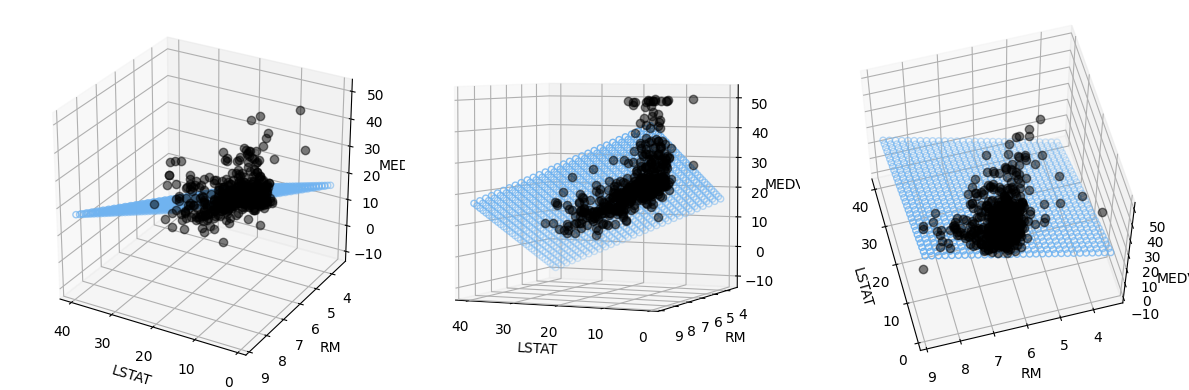

In [11]:
x= X['LSTAT']
y= X['RM']
z = Y

x_pred = np.linspace(1, 40, 30)   # 30 values in the range of LSTAT 
y_pred = np.linspace(3.5, 8.8, 30)  # 30 values in the range of RM
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T
model_vizz = pd.DataFrame(model_viz, columns = ['LSTAT','RM'])

predicted = model.predict(model_vizz)

############################################## Plot ################################################

plt.style.use('default')

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), edgecolor='#70b3f0')
    ax.set_xlabel('LSTAT')
    ax.set_ylabel('RM')
    ax.set_zlabel('MEDV')
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

ax1.view_init(elev=28, azim=120)
ax2.view_init(elev=4, azim=114)
ax3.view_init(elev=60, azim=165)

fig.tight_layout()


# KNN Regression

KNN regression is an alternative approach to numerical regression.

In [21]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=5)
neigh.fit(X_train, Y_train)
print(neigh.predict([[20, 6]]))

[11.48]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  "X does not have valid feature names, but"


In [22]:
y_test_predict = neigh.predict(X_test)
mse = mean_squared_error(Y_test, y_test_predict)
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
MSE is 29.394812371134027
R2 score is 0.6893276322172666
